In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# # This is to copy the files from Drive to the SSD for runtime to make training quicker.
!pwd
!mkdir -p /content/cs7643_model_quantization/data
!cp -r "/content/drive/MyDrive/cs7643_model_quantization/data/gtFine_trainId" "/content/cs7643_model_quantization/data"
!cp -r "/content/drive/MyDrive/cs7643_model_quantization/data/gtFine_trainIdColorized" "/content/cs7643_model_quantization/data"
!cp -r "/content/drive/MyDrive/cs7643_model_quantization/data/leftImg8bit_trainvaltest.zip" "/content/cs7643_model_quantization/data"
!unzip -o /content/cs7643_model_quantization/data/leftImg8bit_trainvaltest.zip -d /content/cs7643_model_quantization/data/leftImg8bit_trainvaltest
!rsync -av --exclude='data' --exclude='.*' --exclude='testing.ipynb' --exclude='myvenv' /content/drive/MyDrive/cs7643_model_quantization/ /content/cs7643_model_quantization/


In [ ]:
%cd /content/cs7643_model_quantization/
!pwd

In [ ]:
!python -m pipeline.fine_tuning

In [ ]:
!python -m src.quantization.qat

Run 0 with config: {'model_checkpoint': 'models/baseline_init_model.pth', 'mode': 'int8', 'weights': {'dtype': 'qint8', 'granularity': 'per_channel'}, 'activations': {'dtype': 'quint8', 'granularity': 'per_tensor', 'observer': 'histogram'}, 'calibration': {'enabled': True, 'steps': 10}, 'training': {'epochs': 5, 'batch_size': 8, 'learning_rate': 0.0001, 'weight_decay': 1e-05, 'train_transforms': {'crop': True, 'resize': True, 'flip': True}, 'val_transforms': {'crop': False, 'resize': False, 'flip': False}}, 'skip_aspp': True}
--- Running QAT Script ---
Loading Configuration ...
Using Device: cuda
Loading Model from checkpoint: models/baseline_init_model.pth ...
Baseline Model Size (MB): 44.35
Building QConfig with mode: int8...
qconfig_mapping global config: QConfig(activation=functools.partial(<class 'torch.ao.quantization.observer.HistogramObserver'>, dtype=torch.quint8, qscheme=torch.per_tensor_affine, quant_min=0, quant_max=127){}, weight=functools.partial(<class 'torch.ao.quantiza

/tmp/ipython-input-2747393818.py:94: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  prepared_model = quantize_fx.prepare_qat_fx(model, qconfig_mapping, (example_image,))


Start Calibration...
Starting QAT...


Validation Epoch 0: 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]


Epoch: 0, Training Loss: 3.0850863456726074, Validation Loss: 2.882685661315918, mIOU: 0.024249953273341084


Validation Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Epoch: 1, Training Loss: 2.8876607418060303, Validation Loss: 2.704012155532837, mIOU: 0.041532355490443276


Validation Epoch 2: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


Epoch: 2, Training Loss: 2.724622964859009, Validation Loss: 2.5496842861175537, mIOU: 0.05535768836100698


Validation Epoch 3: 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]


Epoch: 3, Training Loss: 2.6163222789764404, Validation Loss: 2.4117846488952637, mIOU: 0.07005679734097332


Validation Epoch 4: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
/tmp/ipython-input-2747393818.py:164: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  quantized_model = quantize_fx.convert_fx(prepared_model.eval())


Epoch: 4, Training Loss: 2.5595948696136475, Validation Loss: 2.2747416496276855, mIOU: 0.08849083923727556
Convert QAT model ...
Saving QAT Model ...
QAT Model Size (MB): 33.89
Run 1 with config: {'model_checkpoint': 'models/baseline_init_model.pth', 'mode': 'int8', 'weights': {'dtype': 'qint8', 'granularity': 'per_channel'}, 'activations': {'dtype': 'quint8', 'granularity': 'per_tensor', 'observer': 'histogram'}, 'calibration': {'enabled': True, 'steps': 10}, 'training': {'epochs': 5, 'batch_size': 8, 'learning_rate': 0.001, 'weight_decay': 1e-05, 'train_transforms': {'crop': True, 'resize': True, 'flip': True}, 'val_transforms': {'crop': False, 'resize': False, 'flip': False}}, 'skip_aspp': True}
--- Running QAT Script ---
Loading Configuration ...
Using Device: cuda
Loading Model from checkpoint: models/baseline_init_model.pth ...
Baseline Model Size (MB): 44.35
Building QConfig with mode: int8...
qconfig_mapping global config: QConfig(activation=functools.partial(<class 'torch.ao.

/tmp/ipython-input-2747393818.py:94: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  prepared_model = quantize_fx.prepare_qat_fx(model, qconfig_mapping, (example_image,))


Start Calibration...
Starting QAT...


Validation Epoch 0: 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]


Epoch: 0, Training Loss: 3.0791914463043213, Validation Loss: 1.991398572921753, mIOU: 0.0872804997092626


Validation Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Epoch: 1, Training Loss: 2.3405425548553467, Validation Loss: 1.3686062097549438, mIOU: 0.11351878811642653


Validation Epoch 2: 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]


Epoch: 2, Training Loss: 1.712039589881897, Validation Loss: 1.0255781412124634, mIOU: 0.1689867875134358


Validation Epoch 3: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Epoch: 3, Training Loss: 1.0313209295272827, Validation Loss: 0.9477606415748596, mIOU: 0.17278496936323945


Validation Epoch 4: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
/tmp/ipython-input-2747393818.py:164: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  quantized_model = quantize_fx.convert_fx(prepared_model.eval())


Epoch: 4, Training Loss: 0.7541731595993042, Validation Loss: 0.9580087065696716, mIOU: 0.18838152718129086
Convert QAT model ...
Saving QAT Model ...
QAT Model Size (MB): 33.89
Run 2 with config: {'model_checkpoint': 'models/baseline_init_model.pth', 'mode': 'int6', 'weights': {'dtype': 'qint8', 'granularity': 'per_channel'}, 'activations': {'dtype': 'quint8', 'granularity': 'per_tensor', 'observer': 'histogram'}, 'calibration': {'enabled': True, 'steps': 10}, 'training': {'epochs': 5, 'batch_size': 8, 'learning_rate': 0.0001, 'weight_decay': 1e-05, 'train_transforms': {'crop': True, 'resize': True, 'flip': True}, 'val_transforms': {'crop': False, 'resize': False, 'flip': False}}, 'skip_aspp': True}
--- Running QAT Script ---
Loading Configuration ...
Using Device: cuda
Loading Model from checkpoint: models/baseline_init_model.pth ...
Baseline Model Size (MB): 44.35
Building QConfig with mode: int6...
qconfig_mapping global config: QConfig(activation=functools.partial(<class 'torch.ao

/tmp/ipython-input-2747393818.py:94: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  prepared_model = quantize_fx.prepare_qat_fx(model, qconfig_mapping, (example_image,))


Start Calibration...
Starting QAT...


Validation Epoch 0: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


Epoch: 0, Training Loss: 3.082265853881836, Validation Loss: 2.8836138248443604, mIOU: 0.02618398787858749


Validation Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


Epoch: 1, Training Loss: 2.9196081161499023, Validation Loss: 2.6861445903778076, mIOU: 0.04536988565810988


Validation Epoch 2: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


Epoch: 2, Training Loss: 2.798224687576294, Validation Loss: 2.5080788135528564, mIOU: 0.05577318101761429


Validation Epoch 3: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


Epoch: 3, Training Loss: 2.6378324031829834, Validation Loss: 2.331956386566162, mIOU: 0.06605111795151801


Validation Epoch 4: 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
/tmp/ipython-input-2747393818.py:164: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  quantized_model = quantize_fx.convert_fx(prepared_model.eval())


Epoch: 4, Training Loss: 2.5087947845458984, Validation Loss: 2.172506332397461, mIOU: 0.07943674226348507
Convert QAT model ...
Saving QAT Model ...
QAT Model Size (MB): 33.89
Run 3 with config: {'model_checkpoint': 'models/baseline_init_model.pth', 'mode': 'int6', 'weights': {'dtype': 'qint8', 'granularity': 'per_channel'}, 'activations': {'dtype': 'quint8', 'granularity': 'per_tensor', 'observer': 'histogram'}, 'calibration': {'enabled': True, 'steps': 10}, 'training': {'epochs': 5, 'batch_size': 8, 'learning_rate': 0.001, 'weight_decay': 1e-05, 'train_transforms': {'crop': True, 'resize': True, 'flip': True}, 'val_transforms': {'crop': False, 'resize': False, 'flip': False}}, 'skip_aspp': True}
--- Running QAT Script ---
Loading Configuration ...
Using Device: cuda
Loading Model from checkpoint: models/baseline_init_model.pth ...
Baseline Model Size (MB): 44.35
Building QConfig with mode: int6...
qconfig_mapping global config: QConfig(activation=functools.partial(<class 'torch.ao.q

/tmp/ipython-input-2747393818.py:94: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  prepared_model = quantize_fx.prepare_qat_fx(model, qconfig_mapping, (example_image,))


Start Calibration...
Starting QAT...


Validation Epoch 0: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


Epoch: 0, Training Loss: 3.1045475006103516, Validation Loss: 1.9764379262924194, mIOU: 0.07869413390427508


Validation Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Epoch: 1, Training Loss: 2.3550918102264404, Validation Loss: 1.3854362964630127, mIOU: 0.09427222438066009


Validation Epoch 2: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Epoch: 2, Training Loss: 1.623881220817566, Validation Loss: 1.209039330482483, mIOU: 0.12664619100573218


Validation Epoch 3: 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]


Epoch: 3, Training Loss: 1.0004955530166626, Validation Loss: 1.2839144468307495, mIOU: 0.14451260223794934


Validation Epoch 4: 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
/tmp/ipython-input-2747393818.py:164: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  quantized_model = quantize_fx.convert_fx(prepared_model.eval())


Epoch: 4, Training Loss: 0.8210647702217102, Validation Loss: 1.424754023551941, mIOU: 0.14621274453281766
Convert QAT model ...
Saving QAT Model ...
QAT Model Size (MB): 33.89
Run 4 with config: {'model_checkpoint': 'models/baseline_init_model.pth', 'mode': 'int4', 'weights': {'dtype': 'qint8', 'granularity': 'per_channel'}, 'activations': {'dtype': 'quint8', 'granularity': 'per_tensor', 'observer': 'histogram'}, 'calibration': {'enabled': True, 'steps': 10}, 'training': {'epochs': 5, 'batch_size': 8, 'learning_rate': 0.0001, 'weight_decay': 1e-05, 'train_transforms': {'crop': True, 'resize': True, 'flip': True}, 'val_transforms': {'crop': False, 'resize': False, 'flip': False}}, 'skip_aspp': True}
--- Running QAT Script ---
Loading Configuration ...
Using Device: cuda
Loading Model from checkpoint: models/baseline_init_model.pth ...
Baseline Model Size (MB): 44.35
Building QConfig with mode: int4...
qconfig_mapping global config: QConfig(activation=functools.partial(<class 'torch.ao.

/tmp/ipython-input-2747393818.py:94: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  prepared_model = quantize_fx.prepare_qat_fx(model, qconfig_mapping, (example_image,))


Start Calibration...
Starting QAT...


Validation Epoch 0: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


Epoch: 0, Training Loss: 3.087803840637207, Validation Loss: 2.9055733680725098, mIOU: 0.023806467723878715


Validation Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


Epoch: 1, Training Loss: 2.9171152114868164, Validation Loss: 2.7301201820373535, mIOU: 0.046530353277138004


Validation Epoch 2: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Epoch: 2, Training Loss: 2.787721633911133, Validation Loss: 2.5634281635284424, mIOU: 0.062135938735773645


Validation Epoch 3: 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]


Epoch: 3, Training Loss: 2.7334463596343994, Validation Loss: 2.4197733402252197, mIOU: 0.07586858059232422


Validation Epoch 4: 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
/tmp/ipython-input-2747393818.py:164: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  quantized_model = quantize_fx.convert_fx(prepared_model.eval())


Epoch: 4, Training Loss: 2.4925339221954346, Validation Loss: 2.2883362770080566, mIOU: 0.09220499934013268
Convert QAT model ...
Saving QAT Model ...
QAT Model Size (MB): 33.89
Run 5 with config: {'model_checkpoint': 'models/baseline_init_model.pth', 'mode': 'int4', 'weights': {'dtype': 'qint8', 'granularity': 'per_channel'}, 'activations': {'dtype': 'quint8', 'granularity': 'per_tensor', 'observer': 'histogram'}, 'calibration': {'enabled': True, 'steps': 10}, 'training': {'epochs': 5, 'batch_size': 8, 'learning_rate': 0.001, 'weight_decay': 1e-05, 'train_transforms': {'crop': True, 'resize': True, 'flip': True}, 'val_transforms': {'crop': False, 'resize': False, 'flip': False}}, 'skip_aspp': True}
--- Running QAT Script ---
Loading Configuration ...
Using Device: cuda
Loading Model from checkpoint: models/baseline_init_model.pth ...
Baseline Model Size (MB): 44.35
Building QConfig with mode: int4...
qconfig_mapping global config: QConfig(activation=functools.partial(<class 'torch.ao.

/tmp/ipython-input-2747393818.py:94: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  prepared_model = quantize_fx.prepare_qat_fx(model, qconfig_mapping, (example_image,))


Start Calibration...
Starting QAT...


Validation Epoch 0: 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


Epoch: 0, Training Loss: 3.0776736736297607, Validation Loss: 1.916558027267456, mIOU: 0.09010887148516906


Validation Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Epoch: 1, Training Loss: 2.265470266342163, Validation Loss: 1.489351511001587, mIOU: 0.1253465913770126


Validation Epoch 2: 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]


Epoch: 2, Training Loss: 1.5774757862091064, Validation Loss: 1.2636346817016602, mIOU: 0.13595165056500225


Validation Epoch 3: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Epoch: 3, Training Loss: 1.331186294555664, Validation Loss: 1.261985421180725, mIOU: 0.12005136714742715


Validation Epoch 4: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
/tmp/ipython-input-2747393818.py:164: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  quantized_model = quantize_fx.convert_fx(prepared_model.eval())


Epoch: 4, Training Loss: 0.9415591955184937, Validation Loss: 1.3109196424484253, mIOU: 0.12835584940793707
Convert QAT model ...
Saving QAT Model ...
QAT Model Size (MB): 33.89


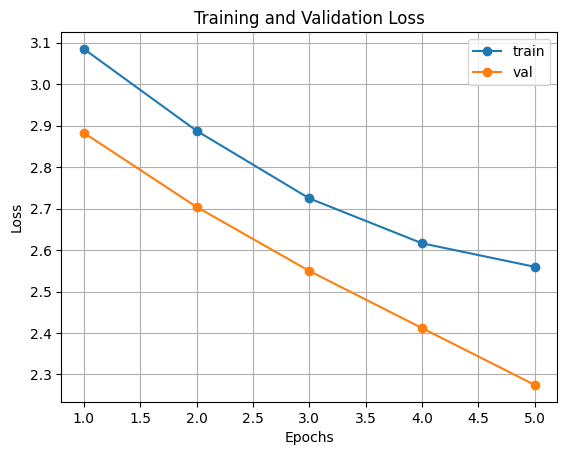

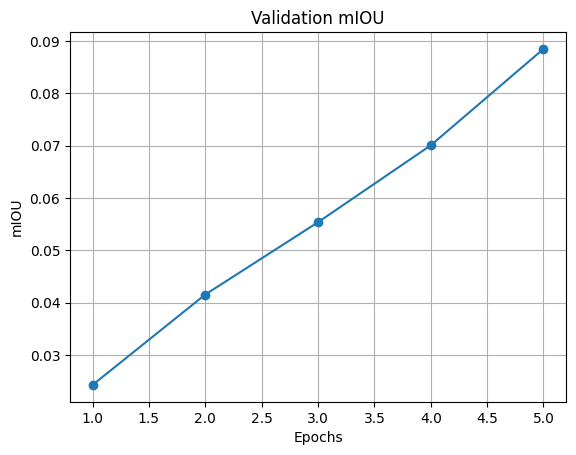

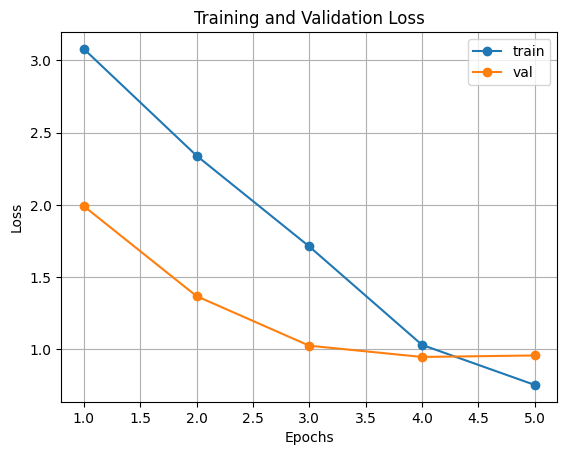

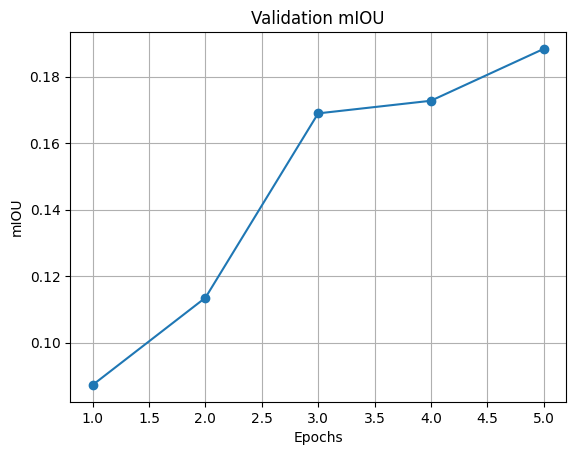

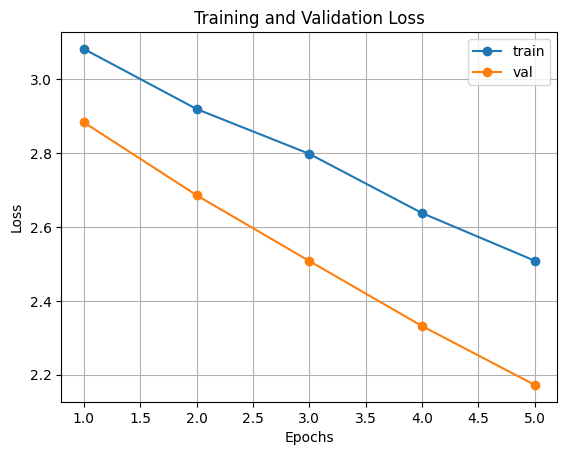

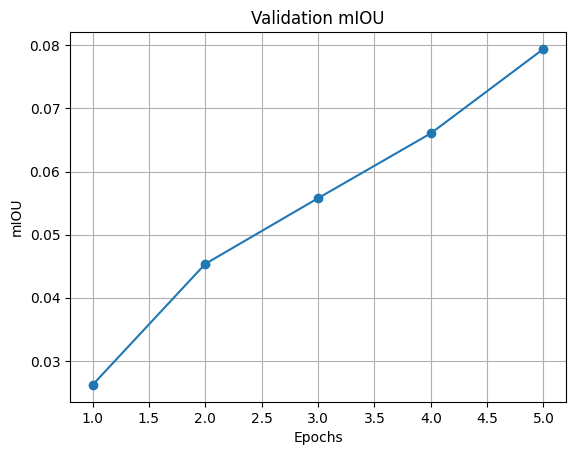

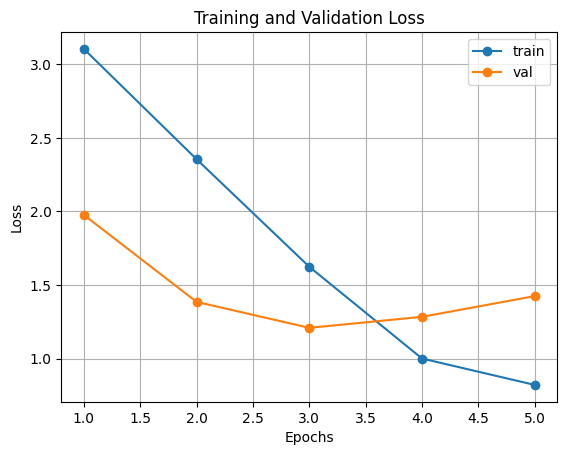

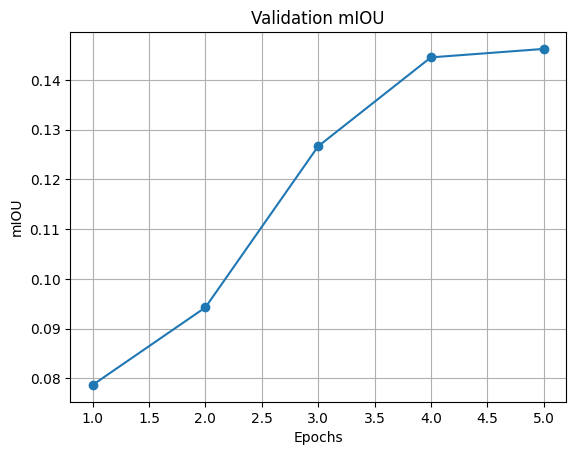

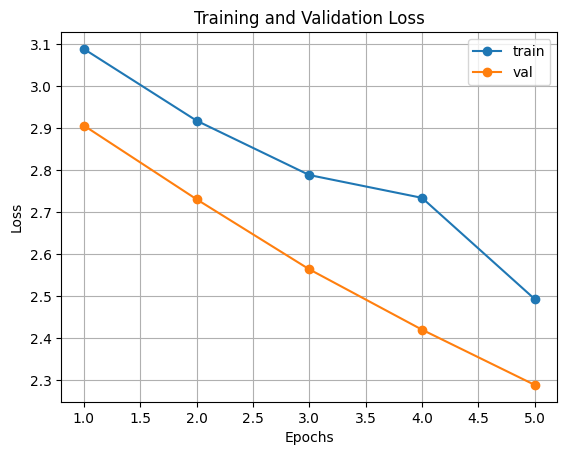

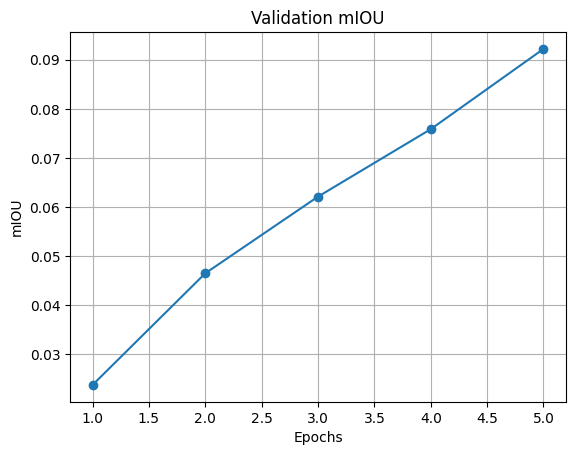

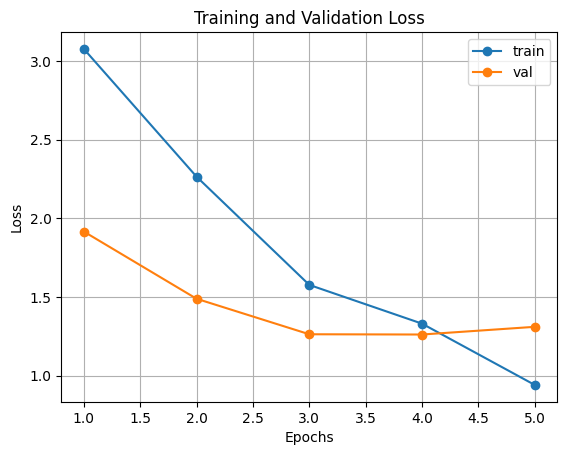

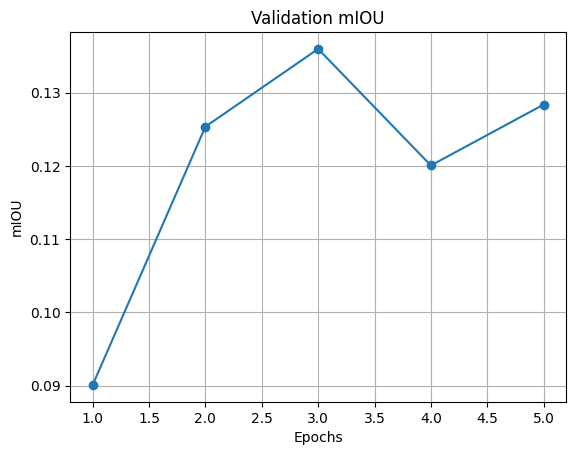

In [ ]:
import os
import glob
import yaml
from PIL import Image
from tqdm import tqdm

import numpy as np
import itertools
import json
import copy

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.ao.quantization as tq
import torch.ao.quantization.quantize_fx as quantize_fx
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from torchvision.transforms import functional as F

from src.models.deeplabv3_mnv3 import get_empty_model, load_model
from src.quantization.quantization_utils import set_seed, build_qconfig
from pipeline.create_dataset import cityScapesDataset
from pipeline.metrics import calculate_miou


def plot_loss(train_losses, val_losses):
    fig, ax = plt.subplots()
    epochs = range(1, len(train_losses)+1)
    ax.plot(epochs, train_losses, marker='o', label='train')
    ax.plot(epochs, val_losses, marker='o', label='val')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend(loc='upper right')
    ax.set_title('Training and Validation Loss')
    ax.grid()
    return fig, ax

def plot_miou(mious):
    fig, ax = plt.subplots()
    epochs = range(1, len(mious)+1)
    ax.plot(epochs, mious, marker='o')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('mIOU')
    ax.set_title('Validation mIOU')
    ax.grid()
    return fig, ax

def run_qat(idx, config):
    set_seed()
    print("--- Running QAT Script ---")
    print("Loading Configuration ...")

    device = 'mps' if torch.backends.mps.is_available() else ('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using Device: {device}")

    print(f"Loading Model from checkpoint: {config['model_checkpoint']} ...")
    # Get empty model and load checkpoint weights.
    model = get_empty_model()
    model = load_model(model, config["model_checkpoint"], device=device)
    model.eval()
    print(f"Baseline Model Size (MB): {os.path.getsize(config['model_checkpoint']) / 1e6:.2f}")

    # Get Quantization Configuration
    print(f"Building QConfig with mode: {config['mode']}...")
    qconfig_mapping = build_qconfig("qat", config)
    print(f"qconfig_mapping global config: {qconfig_mapping.global_qconfig}")
    print(f"qconfig_mapping weight config: {qconfig_mapping.global_qconfig.weight}")
    print(f"qconfig_mapping activation config: {qconfig_mapping.global_qconfig.activation}")

    train_img_path = "data/leftImg8bit_trainvaltest/leftImg8bit/train"
    train_label_path = "data/gtFine_trainId/gtFine/train"
    val_img_path = "data/leftImg8bit_trainvaltest/leftImg8bit/val"
    val_label_path = "data/gtFine_trainId/gtFine/val"

    cal_dataset = cityScapesDataset(train_img_path, train_label_path, config['training']['train_transforms'])
    train_dataset = cityScapesDataset(train_img_path, train_label_path, config['training']['train_transforms'])
    val_dataset = cityScapesDataset(val_img_path, val_label_path, config['training']['val_transforms'])

    cal_dataloader = DataLoader(cal_dataset, batch_size=2, shuffle=True)
    train_dataloader = DataLoader(train_dataset, batch_size=config['training']['batch_size'], shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=config['training']['batch_size'], shuffle=False)

    example_image, _ = next(iter(cal_dataloader))
    example_image = example_image.to(device)
    prepared_model = quantize_fx.prepare_qat_fx(model, qconfig_mapping, (example_image,))
    prepared_model = prepared_model.to(device)
    prepared_model.eval()

    loss_function = nn.CrossEntropyLoss(ignore_index=255)
    optimizer = optim.Adam(prepared_model.parameters(), lr=float(config['training']['learning_rate']),
                                                        weight_decay=float(config['training']['weight_decay']))

    print("Start Calibration...")
    if config['calibration']['enabled']:
        with torch.no_grad():
            for i, (image, _) in enumerate(cal_dataloader):
                image = image.to(device, non_blocking=True)

                prepared_model(image)
                if (i % 10 == 0 and i > 0):
                    print(f"  Calibrated {i} batches ...")

                if (i >= config['calibration']['steps'] - 1):
                    print(f"  Completed {config['calibration']['steps']} calibration steps.")
                    break


    print("Starting QAT...")
    train_losses = []
    val_losses = []
    val_mious = []

    epochs = config['training']['epochs']
    for epoch in range(epochs):
        prepared_model.train()
        training_loss = 0
        for image, label in tqdm(train_dataloader, desc=f"Training Epoch {epoch}"):
            image = image.to(device, non_blocking=True)
            label = label.to(device, non_blocking=True)

            optimizer.zero_grad()
            out = prepared_model(image)['out']
            loss = loss_function(out, label)
            training_loss += loss.item()
            loss.backward()
            optimizer.step()

        prepared_model.eval()
        validation_loss = 0
        val_miou = 0
        with torch.no_grad():
            for image, label in tqdm(val_dataloader, desc=f"Validation Epoch {epoch}"):
                image = image.to(device, non_blocking=True)
                label = label.to(device, non_blocking=True)

                out = prepared_model(image)['out']
                pred = out.argmax(dim=1)
                loss = loss_function(out, label)
                validation_loss += loss.item()
                val_miou += calculate_miou(pred, label)

        average_training_loss = training_loss / len(train_dataloader)
        average_validation_loss = validation_loss / len(val_dataloader)
        average_val_miou = val_miou / len(val_dataloader)

        train_losses.append(average_training_loss)
        val_losses.append(average_validation_loss)
        val_mious.append(average_val_miou)

        print(f"Epoch: {epoch}, Training Loss: {average_training_loss}, Validation Loss: {average_validation_loss}, mIOU: {average_val_miou}")

    print("Convert QAT model ...")
    # must move model to CPU to convert, else it errors!
    prepared_model = prepared_model.cpu()
    quantized_model = quantize_fx.convert_fx(prepared_model.eval())

    # print("Saving QAT Model ...")
    # torch.save(quantized_model.state_dict(), f"models/qat_quantized_model{idx}.pth")
    # print(f"QAT Model Size (MB): {os.path.getsize(f"models/qat_quantized_model{idx}.pth") / 1e6:.2f}")

    # save all results
    result = {
      "idx": idx,
      "config": config,
      "train_losses": [round(loss, 2) for loss in train_losses],
      "val_losses": [round(loss, 2) for loss in val_losses],
      "val_mious": [round(miou, 2) for miou in val_mious],
      "final_train_loss": train_losses[-1],
      "final_val_loss": val_losses[-1],
      "final_val_miou": val_mious[-1]
    }

    json_path = os.path.join(results_dir, "qat_results.json")
    if os.path.exists(json_path):
      with open(json_path, "r") as f:
        results = json.load(f)
    else:
      results = []

    results.append(result)

    with open(json_path, "w") as f:
      json.dump(results, f, indent=2)

    # save all results
    fig, ax = plot_loss(train_losses, val_losses)
    plot_path = os.path.join(results_dir, f"qat_loss_{idx}.png")
    fig.savefig(plot_path)

    fig, ax = plot_miou(val_mious)
    plot_path = os.path.join(results_dir, f"miou_{idx}.png")
    fig.savefig(plot_path)

### start here... ##################################################################################
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

qat_config = {
    "model_checkpoint": "models/baseline_init_model.pth",
    "mode": ['int8','int6', 'int4'],

    "weights": {
        "dtype": "qint8",            # Keep constant.
        "granularity": "per_channel" # "per_channel" or "per_tensor"
    },

    "activations": {
        "dtype": "quint8",        # Keep constant.
        "granularity": "per_tensor",  # Keep constant
        "observer": ["histogram"]
    },

    "calibration": {
        "enabled": True,
        "steps": 10
    },

    "training": {
        "epochs": 5,
        "batch_size": [8],
        "learning_rate": [1e-4, 1e-3],
        "weight_decay": 1e-5,
        "train_transforms": {
            "crop": True,
            "resize": True,
            "flip": True
        },
        "val_transforms": {
            "crop": False,
            "resize": False,
            "flip": False
        }
    },
    "skip_aspp": [True]
}

modes = qat_config['mode']
act_observers = qat_config["activations"]["observer"]
training_batch_sizes = qat_config["training"]["batch_size"]
training_learning_rates = qat_config["training"]["learning_rate"]
skip_aspps = qat_config["skip_aspp"]

for i, (mode, act_observer, training_batch_size, training_learning_rate, skip_aspp) in enumerate(itertools.product(modes, act_observers, training_batch_sizes, training_learning_rates, skip_aspps)):
  current_config = copy.deepcopy(qat_config)
  current_config['mode'] = mode
  current_config["activations"]["observer"] = act_observer
  current_config["training"]["batch_size"] = training_batch_size
  current_config["training"]["learning_rate"] = training_learning_rate
  current_config["skip_aspp"] = skip_aspp

  print(f"Run {i} with config: {current_config}")

  run_qat(i, current_config)


